In [1]:
# Import our dependencies (libraries)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from pathlib import Path
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os


2023-01-30 18:15:13.311668: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#  Import and read the csv file
import pandas as pd 
df = pd.read_csv("framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:

# To check the data data-types & number of rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [4]:
# Determine the number of unique values in each column
df.nunique()


male                  2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1363
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64

In [5]:
# statistical summaries for the dataset
df.describe()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
#Check for null valumes on each column
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
# Dropped 'Education' column as it is not related 
df.drop(["education"],axis=1,inplace = True)
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
# Dropped 'Diabetes' column 
df.drop(["diabetes"],axis=1,inplace = True)
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
#To check for duplicate values
df.duplicated().sum()

0

In [10]:
# Checking the data set
df.cigsPerDay.describe()
     

count    4209.000000
mean        9.003089
std        11.920094
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

In [11]:
# Using Median to fill the NAs for 'CigsPerDay' as the values are not continous(Mean#9 & 50%#0.00)
df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True)

In [12]:

# Identify the mean values for the columns
df.mean()


male                 0.429212
age                 49.584946
currentSmoker        0.494101
cigsPerDay           8.941482
BPMeds               0.029630
prevalentStroke      0.005899
prevalentHyp         0.310524
totChol            236.721585
sysBP              132.352407
diaBP               82.893464
BMI                 25.802008
heartRate           75.878924
glucose             81.966753
TenYearCHD           0.151958
dtype: float64

In [13]:
df.median()

male                 0.0
age                 49.0
currentSmoker        0.0
cigsPerDay           0.0
BPMeds               0.0
prevalentStroke      0.0
prevalentHyp         0.0
totChol            234.0
sysBP              128.0
diaBP               82.0
BMI                 25.4
heartRate           75.0
glucose             78.0
TenYearCHD           0.0
dtype: float64

In [14]:
# To replce the null values with the column mean values, to have a wide dataset
df = df.fillna(df.median())
df.head()
     

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [15]:
# To check the data data-types & number of rows (No null values now)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4238 non-null   float64
 4   BPMeds           4238 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   totChol          4238 non-null   float64
 8   sysBP            4238 non-null   float64
 9   diaBP            4238 non-null   float64
 10  BMI              4238 non-null   float64
 11  heartRate        4238 non-null   float64
 12  glucose          4238 non-null   float64
 13  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(6)
memory usage: 463.7 KB


In [16]:

# CHD value counts
dist_df = df.TenYearCHD.value_counts().to_frame()
dist_df


,TenYearCHD
0,3594
1,644


In [17]:
# To find the correlation of each column
df.corr()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.197596,0.315630,-0.051545,-0.004546,0.005313,-0.069549,-0.035989,0.057933,0.081653,-0.116621,0.010073,0.088428
age,-0.028979,1.000000,-0.213748,-0.191847,0.120955,0.057655,0.307194,0.260105,0.394302,0.206104,0.135174,-0.012848,0.117788,0.225256
currentSmoker,0.197596,-0.213748,1.000000,0.760239,-0.048358,-0.032988,-0.103260,-0.046466,-0.130230,-0.107746,-0.167161,0.062330,-0.055177,0.019456
cigsPerDay,0.315630,-0.191847,0.760239,1.000000,-0.044675,-0.032244,-0.065046,-0.026976,-0.088375,-0.056687,-0.092211,0.073853,-0.056863,0.058859
BPMeds,-0.051545,0.120955,-0.048358,-0.044675,1.000000,0.114609,0.258697,0.078578,0.251503,0.192356,0.099584,0.015142,0.049124,0.086417
prevalentStroke,-0.004546,0.057655,-0.032988,-0.032244,0.114609,1.000000,0.074830,0.000123,0.057009,0.045190,0.024265,-0.017674,0.018722,0.061810
prevalentHyp,0.005313,0.307194,-0.103260,-0.065046,0.258697,0.074830,1.000000,0.163054,0.696755,0.615751,0.300510,0.147196,0.083571,0.177603
totChol,-0.069549,0.260105,-0.046466,-0.026976,0.078578,0.000123,0.163054,1.000000,0.207522,0.163888,0.114811,0.090537,0.045559,0.081566
sysBP,-0.035989,0.394302,-0.130230,-0.088375,0.251503,0.057009,0.696755,0.207522,1.000000,0.784002,0.325161,0.182143,0.135136,0.216429
diaBP,0.057933,0.206104,-0.107746,-0.056687,0.192356,0.045190,0.615751,0.163888,0.784002,1.000000,0.376623,0.181257,0.059042,0.145299


In [18]:
# Importing the required packages for data modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score,roc_curve, classification_report
from statsmodels.tools import add_constant
import warnings
warnings.filterwarnings('ignore')


#ensembling
# from mlxtend.classifier import StackingCVClassifier

# Defining the variables X & y
X = df.drop(['TenYearCHD'], axis=1)
X = add_constant(X)
y = df['TenYearCHD']

# Split the preprocessed dataset into the Training and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0)

# Create a StandardScaler instances
scaler =StandardScaler()

# Scaling & fit the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


     



In [19]:

# Checking if the data is equally split (if unbalanced or not)
from collections import Counter
print(y_test.unique())
Counter(y_train)
     


[0 1]


Counter({0: 1790, 1: 329})

array([[<AxesSubplot:title={'center':'const'}>,
        <AxesSubplot:title={'center':'male'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'currentSmoker'}>],
       [<AxesSubplot:title={'center':'cigsPerDay'}>,
        <AxesSubplot:title={'center':'BPMeds'}>,
        <AxesSubplot:title={'center':'prevalentStroke'}>,
        <AxesSubplot:title={'center':'prevalentHyp'}>],
       [<AxesSubplot:title={'center':'totChol'}>,
        <AxesSubplot:title={'center':'sysBP'}>,
        <AxesSubplot:title={'center':'diaBP'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'heartRate'}>,
        <AxesSubplot:title={'center':'glucose'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

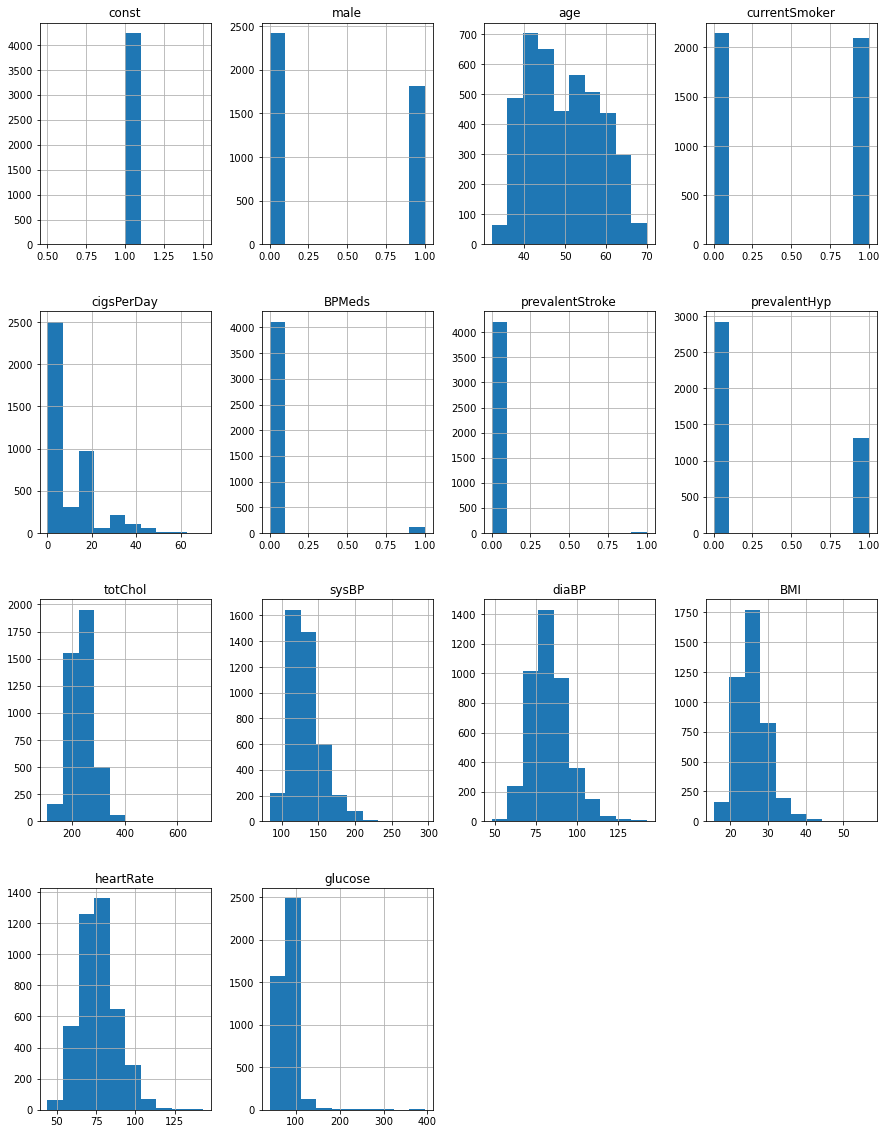

In [20]:
#Graphical representation on the dataset in histograms 
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
pd.DataFrame(X).hist(ax = ax)

In [21]:

#Logistic Regression
#classifier = LogisticRegression(random_state=0)
#classifier.fit(X_train,y_train)
#y_pred = classifier.predict(X_test)

m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

#matrix = confusion_matrix(y_test, y_pred)
#print(matrix)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)

#report = classification_report(y_test, y_pred)
#print(report)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))


confussion matrix
[[1792   12]
 [ 292   23]]


Accuracy of Logistic Regression: 85.6536101934875 

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1804
           1       0.66      0.07      0.13       315

    accuracy                           0.86      2119
   macro avg       0.76      0.53      0.53      2119
weighted avg       0.83      0.86      0.80      2119

